In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,auc,roc_auc_score
from sklearn.decomposition import PCA
from sklearn.utils import resample
#读取数据集
train_features=np.load('train_features.npy')
train_labels=np.load('train_labels.npy')
test_features=np.load('test_features.npy')

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 16, 1, 96)         1152      
                                                                 
 batch_normalization_20 (Bat  (None, 16, 1, 96)        384       
 chNormalization)                                                
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 8, 1, 96)         0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 8, 1, 256)         123136    
                                                                 
 batch_normalization_21 (Bat  (None, 8, 1, 256)        1024      
 chNormalization)                                                
                                                     

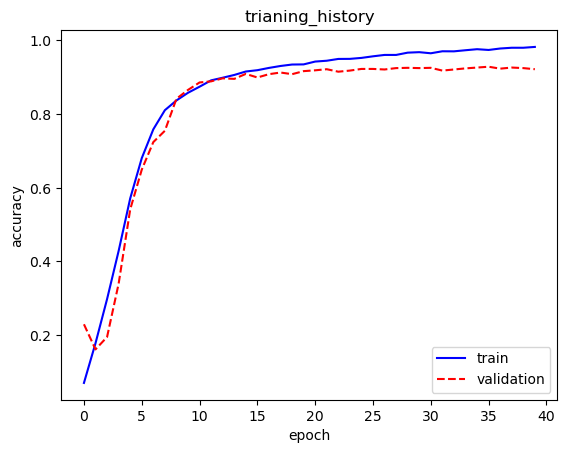

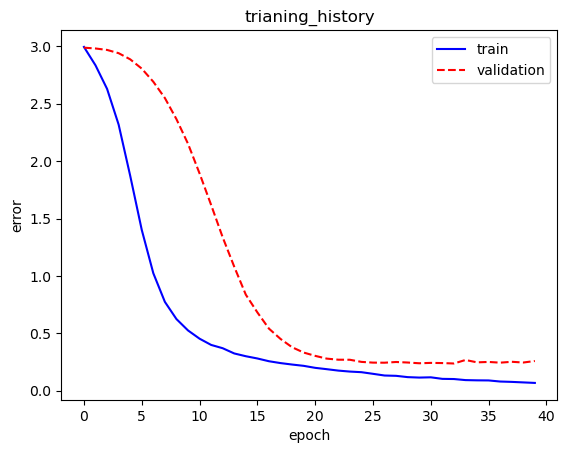

209/209 [==============================] - 2s 10ms/step - loss: 0.0806 - accuracy: 0.9776
误差： 0.08063767850399017
准确率： 0.9776477813720703


In [44]:
from matplotlib import pyplot as plt
from keras.utils import np_utils
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.models import Sequential
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,auc,roc_auc_score
from sklearn.decomposition import PCA
from sklearn.utils import resample
#读取数据集
train_features=np.load('train_features.npy')
train_labels=np.load('train_labels.npy')
test_features=np.load('test_features.npy')
#(X_train,Y_train),(X_test,Y_test)=mnist.load_data()
X_test=test_features
X_test1=X_test.reshape(-1,1536,1).astype("float32")
pca = PCA(n_components=63)
pca.fit(train_features)
train_features= pca.transform(train_features)
test_features= pca.transform(test_features)
#处理图像特征
X_train=train_features.reshape(-1,63,1,1).astype("float32")
X_test=test_features.reshape(-1,63,1,1).astype("float32")
#处理标签
train_label=np_utils.to_categorical(train_labels,20)
#test_label=np_utils.to_categorical(test_label,20)
#print(X_train)
#print("-----------")
#print(Y_train)
 
#搭建AlexNet网络模型
#建立第一层卷积
model=Sequential()
model.add(Conv2D(
    filters=96,
    kernel_size=(11,1),
    strides=4,
    padding="same",
    input_shape=(63,1,1),
    activation="relu"
))
 
#搭建BN层
model.add(BatchNormalization())
#搭建第一层重叠最大池化层
model.add(MaxPool2D(
    pool_size=(3,1),
    strides=2,
    padding="same"
))
 
#建立第二层卷积
model.add(Conv2D(
    filters=256,
    kernel_size=(5,1),
    strides=1,
    padding="same",
    activation="relu"
))
#搭建BN层
model.add(BatchNormalization())
#搭建第二层池化层
model.add(MaxPool2D(
    pool_size=(3,1),
    strides=2,
    padding="same",
))
 
#搭建第三层卷积
model.add(Conv2D(
    filters=384,
    kernel_size=(3,1),
    strides=1,
    padding="same",
    activation="relu",
))
 
#搭建第四层卷积
model.add(Conv2D(
    filters=384,
    kernel_size=(3,1),
    strides=1,
    padding="same",
    activation="relu"
))
 
#搭建第五卷积层
model.add(Conv2D(
    filters=256,
    kernel_size=(3,1),
    strides=1,
    padding='same',
    activation="relu"
))
model.add(MaxPool2D(
    pool_size=(3,1),
    strides=2,
    padding="same"
))
 
#搭建第六层：全连接层
#在搭建全连接层之前，必须使用Flatten()降维
model.add(Flatten())
#全连接层
model.add(Dense(4096,activation="relu"))
model.add(Dropout(0.5))
#搭建第七层：全连接层
model.add(Dense(2048,activation="relu"))
model.add(Dropout(0.5))
#搭建第八层：全连接层即输出层
model.add(Dense(20,activation="softmax"))
model.summary()
 
#编译
model.compile(
    loss="categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)
 
#训练
n_epoch=40
n_batch=250
training = model.fit(
    X_train,
    train_label,
    epochs=n_epoch,
    batch_size=n_batch,
    verbose=1,
    validation_split=0.20
)
 
#画出准确率随着epoch的变化图
def show_train(tr,train,validation):
    plt.plot(training.history[train],linestyle="-",color="b")
    plt.plot(training.history[validation],linestyle="--",color="r")
    plt.title("trianing_history")
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.legend(["train","validation"],loc="lower right")
    plt.show()
show_train(training,"accuracy","val_accuracy")
#画出误差随着epoch的变化图
def show_train(tr,train,validation):
    plt.plot(training.history[train],linestyle="-",color="b")
    plt.plot(training.history[validation],linestyle="--",color="r")
    plt.title("trianing_history")
    plt.xlabel("epoch")
    plt.ylabel("error")
    plt.legend(["train","validation"],loc="upper right")
    plt.show()
show_train(training,"loss","val_loss")
 
#评估
test=model.evaluate(X_train,train_label,verbose=1)
print("误差：",test[0])
print("准确率：",test[1])

In [42]:
test_feature=test_features.reshape(-1,1536,1,1)
prediction=model.predict(test_feature)
prediction0=np.zeros(2857)
for i in range(2857):
    t=0;k=0
    for j in range(20):
        if (prediction[i][j]>k):
            t=j
            k=prediction[i][j]
    prediction0[i]=t
prediction0
np.savetxt('outputCNN.csv', prediction0, delimiter=', ')

90/90 [==============================] - 6s 65ms/step


In [43]:
prediction0

array([11.,  8.,  9., ...,  8., 16.,  4.])